Consider in total, 5 trials,

 

---



1.   you have 4 queens in a 4x4 seating space.
2.   you have 5 queens in a 5x5 seating space.
3.   you have 6 queens in a 6x6 seating space.
4.  you have 7 queens in a 7x7 seating space.
5.  you have 8 queens in a 8x8 seating space.
5.  you have 9 queens in a 9x9 seating space.
5.  you have 10 queens in a 10x10 seating space.

----


In the end, plot a graph with all five trials in X-axis and following metrices in Y axis,
 * The number of nodes explored 
 * Optimnal path cost 
 * Total time taken by A* algorithm 

Define heuristics

In [ ]:
def queen_heuristic(seqs,size):
  state=[]
  attack_queens=0
  dictt={}
  for i in range(1, size+1):
    if seqs[i-1] != 0: 
      state.append((seqs[i-1],i-1))
  for (x,y) in state:
    for (i,j) in state:
      if((x,y)!=(i,j)):
        if(x==i or y==j or abs(x-i)==abs(y-j)):
          dictt[(i,j)]=1
          dictt[(x,y)]=1
  
  for val in dictt.values():
    if(val==1):
      attack_queens=attack_queens+1

  return attack_queens



  

# New Heusristic:


*   **New heuristic** is defined as the **total number of attacks** queens are making to each other.




In [ ]:
def new_heuristic(seqs,size): # defining a new heuristics 
  state=[]
  total_attacks=0
  dictt={}
  for i in range(1, size+1):
    if seqs[i-1] != 0: 
      state.append((seqs[i-1],i-1))
  for (x,y) in state:
    for (i,j) in state:
      if((x,y)!=(i,j)):
        if(x==i or y==j or abs(x-i)==abs(y-j)):
          total_attacks = total_attacks + 1
  
  

  return total_attacks


Your solution using A*

In [ ]:
# Your code goes here






def queenastar(size):  #calls original heuristic
  
  nodes_explored=1
  cost=0
  fin = False 
  from queue import PriorityQueue
  p_q = PriorityQueue()
  p_q.put((size,size,0,[0]*size))
  
  solution=[]

  while p_q: 
    state = p_q.get()  
    if(cost<=(state[2]*(state[2]-1))/2):
      cost=cost+ state[2]
    q_list = state[3]
    if(state[1] == 0 and state[2] == size): 
        fin = True 
        solution = state[3] 
        break
    rows = list(range(1, size+1))  

    if q_list.count(0) != 0: 
        for i in range(size): 
          col = q_list.index(0)
          nodes_explored=nodes_explored+1
          random.seed(27)
          ro = random.choice(rows)  
          rows.remove(ro)  
          cpy = list(q_list)
          cpy[col] = ro 
          val = size - cpy.count(0)
          
          h = queen_heuristic(cpy,size)
          #val= val-h
          fn = val + h
          p_q.put((fn,h,val ,cpy))  
          

  if(fin==True):
    
    print('Goal found')
  else:
    print('Goal cannot be found')

  
  return nodes_explored, cost, solution


def myqueenastar(size):  #calls new heuristic
  
  nodes_explored=1
  cost=0
  fin = False 
  from queue import PriorityQueue
  p_q = PriorityQueue()
  p_q.put((size,size,0,[0]*size))
  
  solution=[]

  while p_q: 
    state = p_q.get()  
    if(cost<=(state[2]*(state[2]-1))/2):
      cost=cost+ state[2]
    q_list = state[3]
    if(state[1] == 0 and state[2] == size): 
        fin = True 
        solution = state[3] 
        break
    rows = list(range(1, size+1))  

    if q_list.count(0) != 0: 
        for i in range(size): 
          col = q_list.index(0)
          nodes_explored=nodes_explored+1
          random.seed(27)
          ro = random.choice(rows)  
          rows.remove(ro)  
          cpy = list(q_list)
          cpy[col] = ro 
          val = size - cpy.count(0)
          h = new_heuristic(cpy,size)      
          #val= val-h
          fn = val + h
          p_q.put((fn,h,val ,cpy))  
         

  if(fin==True):
    
    print('Goal found')
    
  else:
    print('Goal cannot be found')

  
  return nodes_explored, cost, solution

I have created 2 functions: queenastar() and myqueenastar().

The only difference is queenastar() calls the original heuristic and myqueenastar() call the new heuristic.

#### Trial 1: 4 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 

import random
import time

size=4
nodes_exp_l = []
mynodes_exp = []
optimal_cost = []
myoptimal_cost = []
time_t = []
mytime_t = []


start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time0.00s
Number of Nodes explored :  61
Path Cost :  10

CHESS BOARD ===>
0 0 1 0 

0 0 0 0 

0 1 0 0 

0 0 0 1 


New heuristic :
Goal found
Time0.00s
Number of Nodes explored :  61
Path Cost :  10

CHESS BOARD ===>
0 0 1 0 

0 0 0 0 

0 1 0 0 

0 0 0 1 



The above output first shows the time, number of nodes explored, path cost for original heurstic and then for the new heuristic.

#### Trial 2: 5 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=5




start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time0.01s
Number of Nodes explored :  286
Path Cost :  15

CHESS BOARD ===>
0 1 0 0 0 

0 0 0 1 0 

0 0 0 0 0 

0 0 1 0 0 

0 0 0 0 1 


New heuristic :
Goal found
Time0.01s
Number of Nodes explored :  286
Path Cost :  15

CHESS BOARD ===>
0 1 0 0 0 

0 0 0 1 0 

0 0 0 0 0 

0 0 1 0 0 

0 0 0 0 1 



#### Trial 3: 6 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 

size=6


start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")


Goal found
Time0.05s
Number of Nodes explored :  1639
Path Cost :  21

CHESS BOARD ===>
0 0 1 0 0 0 

0 0 0 0 1 0 

0 0 0 0 0 0 

0 1 0 0 0 0 

0 0 0 1 0 0 

0 0 0 0 0 1 


New heuristic :
Goal found
Time0.05s
Number of Nodes explored :  1639
Path Cost :  21

CHESS BOARD ===>
0 0 1 0 0 0 

0 0 0 0 1 0 

0 0 0 0 0 0 

0 1 0 0 0 0 

0 0 0 1 0 0 

0 0 0 0 0 1 



#### Trial 4: 7 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=7


start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")


Goal found
Time0.27s
Number of Nodes explored :  9675
Path Cost :  28

CHESS BOARD ===>
0 1 0 0 0 0 0 

0 0 0 1 0 0 0 

0 0 0 0 0 1 0 

0 0 0 0 0 0 0 

0 0 1 0 0 0 0 

0 0 0 0 1 0 0 

0 0 0 0 0 0 1 


New heuristic :
Goal found
Time0.29s
Number of Nodes explored :  9052
Path Cost :  28

CHESS BOARD ===>
0 1 0 0 0 0 0 

0 0 0 1 0 0 0 

0 0 0 0 0 1 0 

0 0 0 0 0 0 0 

0 0 1 0 0 0 0 

0 0 0 0 1 0 0 

0 0 0 0 0 0 1 



#### Trial 5: 8 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size=8



start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time2.12s
Number of Nodes explored :  65097
Path Cost :  36

CHESS BOARD ===>
0 1 0 0 0 0 0 0 

0 0 0 0 0 1 0 0 

0 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 0 

0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 

0 0 0 0 1 0 0 0 


New heuristic :
Goal found
Time1.65s
Number of Nodes explored :  53945
Path Cost :  36

CHESS BOARD ===>
0 1 0 0 0 0 0 0 

0 0 0 0 0 1 0 0 

0 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 0 

0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 

0 0 0 0 1 0 0 0 



#### Trial 6: 9 queens

In [ ]:
# Code to generate a 2D grid world
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size= 9



start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time18.33s
Number of Nodes explored :  491860
Path Cost :  45

CHESS BOARD ===>
0 1 0 0 0 0 0 0 0 

0 0 0 1 0 0 0 0 0 

0 0 0 0 0 0 1 0 0 

0 0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 0 

0 0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 1 0 

0 0 0 0 0 1 0 0 0 


New heuristic :
Goal found
Time13.26s
Number of Nodes explored :  363610
Path Cost :  45

CHESS BOARD ===>
0 1 0 0 0 0 0 0 0 

0 0 0 1 0 0 0 0 0 

0 0 0 0 0 0 1 0 0 

0 0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 0 

0 0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 1 0 

0 0 0 0 0 1 0 0 0 



#### Trial 7: 10 queens

In [ ]:
# Code to generate a 2D grid world.
# 0 represents empty position and 1 will denote that a queen currently occupy the given position. 
size= 10



start = time.time()
nodes_exp, cost, solution=queenastar(size)
end = time.time()
time_t.append((end-start))
nodes_exp_l.append(nodes_exp)
optimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

print("\nNew heuristic :")
start = time.time()
nodes_exp, cost, solution=myqueenastar(size)
end = time.time()
mytime_t.append((end-start))
mynodes_exp.append(nodes_exp)
myoptimal_cost.append(cost)
print('Time' + str('%.2f' % (end-start)) + 's')
print('Number of Nodes explored : ', nodes_exp)
print('Path Cost : ', cost)
print('\nCHESS BOARD ===>')
for i in range(size):
  val = solution.pop(0)
  for j in range(size):
    
    if(val==j):
      print('1',end =" ")
    else:
      print('0', end =" ")
  print("\n")

Goal found
Time165.54s
Number of Nodes explored :  3928951
Path Cost :  55

CHESS BOARD ===>
0 1 0 0 0 0 0 0 0 0 

0 0 0 1 0 0 0 0 0 0 

0 0 0 0 0 0 1 0 0 0 

0 0 0 0 0 0 0 0 1 0 

0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 0 0 

0 0 0 0 1 0 0 0 0 0 

0 0 0 0 0 0 0 1 0 0 


New heuristic :
Goal found
Time106.66s
Number of Nodes explored :  2632391
Path Cost :  55

CHESS BOARD ===>
0 1 0 0 0 0 0 0 0 0 

0 0 0 1 0 0 0 0 0 0 

0 0 0 0 0 0 1 0 0 0 

0 0 0 0 0 0 0 0 1 0 

0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 1 0 0 0 0 

0 0 0 0 0 0 0 0 0 1 

0 0 1 0 0 0 0 0 0 0 

0 0 0 0 1 0 0 0 0 0 

0 0 0 0 0 0 0 1 0 0 



[Text(0, 0.5, 'Nodes Explored'), Text(0.5, 0, 'SIZE')]

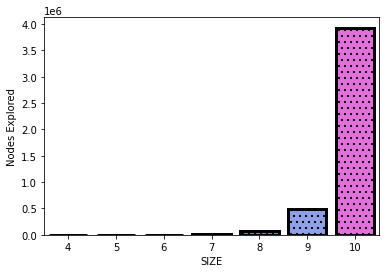

In [ ]:
X = [4, 5, 6, 7, 8, 9, 10]

'''nodes_exp_l = []
mynodes_exp = []
optimal_cost = []
myoptimal_cost = []
time_t = []
mytime_t = []'''
n_e=sns.barplot(x=X, y=nodes_exp_l, palette="husl",lw=3,ec="black",hatch="..")
n_e.set(xlabel ="SIZE", ylabel = "Nodes Explored")



**Observations:**


*   The graph above represents number of nodes explored for each trial size.
*   We can see as the size increases the number of nodes explored increases exponentially. This happens because as we increase the size the number of states also increase, so ultimately this leads to more number of states explored.



[Text(0, 0.5, 'Optimal Cost'), Text(0.5, 0, 'SIZE')]

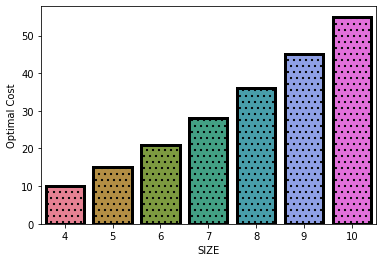

In [ ]:
o_c=sns.barplot(x=X, y=optimal_cost, palette="husl",lw=3,ec="black",hatch="..")
o_c.set(xlabel ="SIZE", ylabel = "Optimal Cost")

**Observations:**


*   The above graph represents the optimal cost for each trial size.
*   As size increases the optimal cost also increases. This happens because as we increase the size the cost to reach the goal state also increases.



[Text(0, 0.5, 'Time in seconds'), Text(0.5, 0, 'SIZE')]

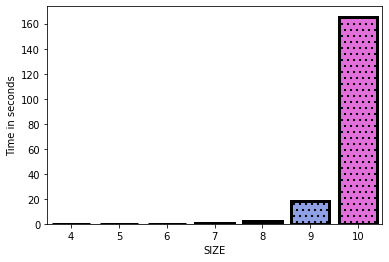

In [ ]:
t_t = sns.barplot(x=X, y=time_t, palette="husl",lw=3,ec="black",hatch="..")
t_t.set(xlabel ="SIZE", ylabel = "Time in seconds")

**Observations:**


*   The above graph represents time for finding the goal state for each trial.
*   We can see as we increase the size the time also increases very significantly. This happens because increase in size leads to increase in number of states and thus the search takes more time to find the goal state. 



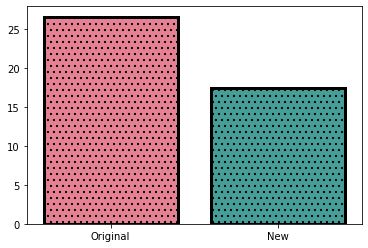

In [ ]:
time_h = []
time_h.append(np.mean(time_t))
time_h.append(np.mean(mytime_t))
heuristics = ["Original", "New"]
sns.barplot(x=heuristics, y=time_h, palette="husl",lw=3,ec="black",hatch="..")


**Observations:**


*   The above graph helps in comparing the original heuristic with the new heuristic.
*   Y-axis shows the mean time of all the trials for each heuristic function.


*   We can clearly notice that new heuristic function returns better time than our original heuristic function.
*   So, we can see that the new heuristic function performs better than the original heuristic function.



